In [1]:
from birdseye import Birdseye
import numpy as np
import pickle
import cv2

In [2]:
calibration_data = pickle.load(open("calibration_data.pkl","rb"))

camera_matrix = calibration_data["camera_matrix"]
dist_coef = calibration_data["distortion_coefficient"]

source_points = [(580, 460), (205, 720), (1110, 720), (703, 460)]
dest_points = [(320, 0), (320, 720), (960, 720), (960, 0)]

birdEye = Birdseye(source_points, dest_points, camera_matrix, dist_coef)

In [3]:
img1 = cv2.cvtColor(cv2.imread("test_images/straight_lines1.jpg"),cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("test_images/straight_lines2.jpg"),cv2.COLOR_BGR2RGB)

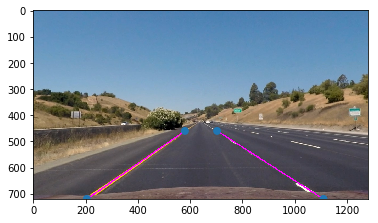

In [4]:
temp = birdEye.undistort(img1, show_dotted = True)

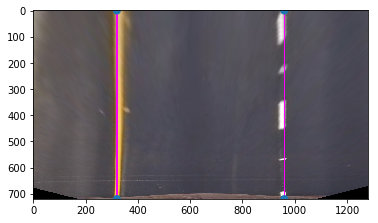

In [5]:
temp = birdEye.sky_view(img1, show_dotted = True)

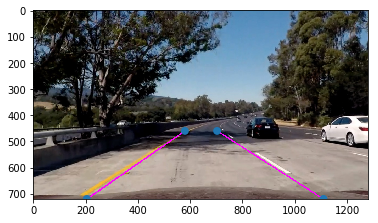

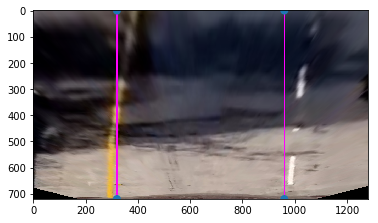

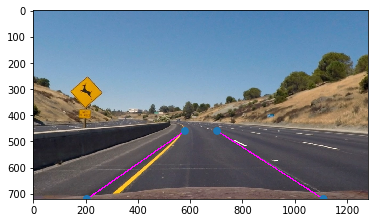

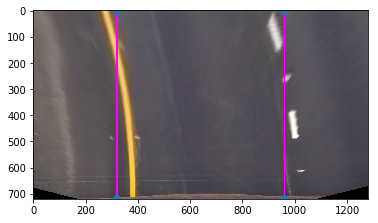

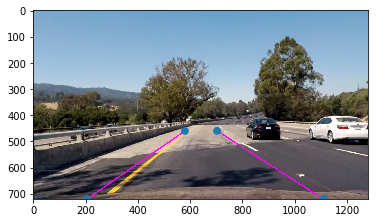

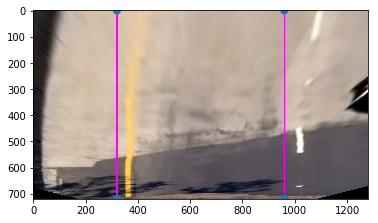

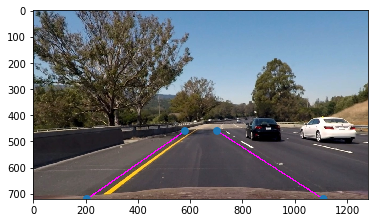

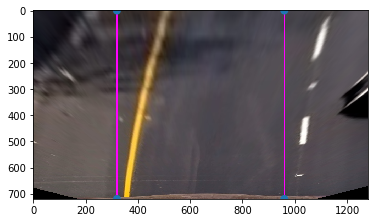

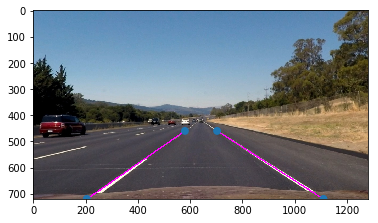

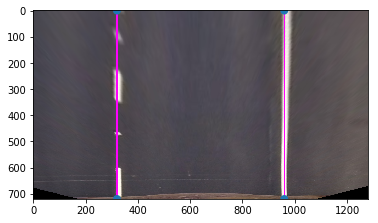

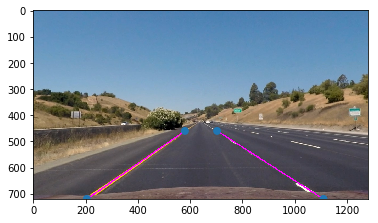

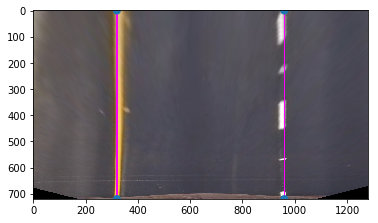

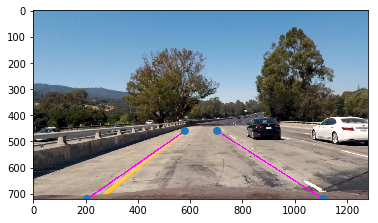

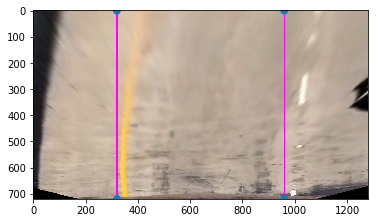

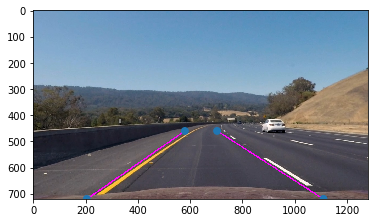

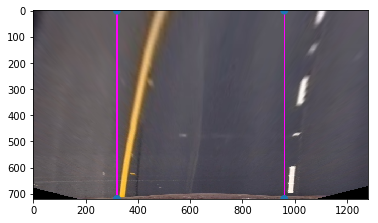

In [8]:
# This for testing all image in once

import os, time

i=0
for root, direc, files in os.walk('test_images'):
    for file in files:
        img = os.path.abspath(os.path.join(root,file))
        data = cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB)
        undistort = birdEye.undistort(data, show_dotted = True)
        cv2.imwrite("output_files/undistort"+str(i)+".jpg", cv2.cvtColor(undistort, cv2.COLOR_BGR2RGB))
        #time.sleep(2)
        sky = birdEye.sky_view(data, show_dotted = True)
        cv2.imwrite("output_files/sky_view"+str(i)+".jpg", cv2.cvtColor(sky, cv2.COLOR_BGR2RGB))
        #time.sleep(2)
        i+=1
